# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [49]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import math
from scipy import stats

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [34]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [31]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Robin/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


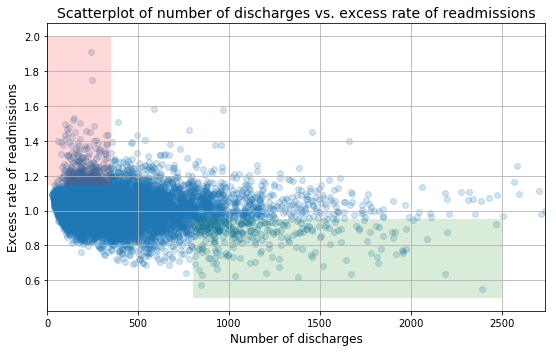

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

There's basically two seperate conclusion from the preliminary test: 
1. The hospitals/facilities with number of discharges < 100 has higher rate for excess readmission rate greater than 1 than that of discharges > 1000
2. The hosipitals/facilities with number of discharges < 100 has higher mean excess readmission rate than that of discharges >1000

We should examine this two conclusions seperately using two-sample test.
Let's first build two-sample test for the rate for excess readmission rate greater than 1.

In [67]:
# Set up a data frame for Discharges and Excess Readmission Rate
df = pd.DataFrame(data = {'Discharges':x, 'Excess Readmission Ratio':y})
# Add a column to describe whether the excess readmission Rate is large than 1
df['Excess'] = 0
df.loc[df['Excess Readmission Ratio'] >= 1, 'Excess'] = 1

# Divide the data into two groups, no. of discharges < 100 and no. of discharges > 1000
dLarge = df[df.Discharges >= 1000]['Excess']
dSmall = df[df.Discharges <= 100]['Excess']

# Calculate and build confidence level to the rate for excess readmission rate greater than 1
meanL = dLarge.mean()
varL = dLarge.var()
meanvarL = varL/len(dLarge)
meanS = dSmall.mean()
varS = dSmall.var()
meanvarS = varS/len(dSmall)

meanDiff = meanL - meanS
meanvarDiff = meanvarL + meanvarS
stderrorDiff = math.sqrt(meanvarDiff)

# Assume significant level alpha = 0.1
zscore = stats.norm.ppf(1-0.05)
marginError = stderrorDiff * zscore
pvalue = stats.norm.cdf(meanDiff/stderrorDiff)

print('Difference between the two groups =', round(meanDiff,4))
print('Margin of error =', round(marginError, 4) )
print('Confidence interval =', -round(marginError,4), ' to ', round(marginError,4))
print('P-value =', pvalue)


Difference between the two groups = -0.1833
Margin of error = 0.0444
Confidence interval = -0.0444  to  0.0444
P-value = 5.50227043122e-12


From the calculation above, we can conclude that, in average, the hosipital/facility with larger discharge does have lower rate for excess readmission rate smaller than 1. The difference is 18.3%, which is very significant with p-value  5.5x10$^{-12}$. Therefore, we can conclude that there is significant lower rate for hospital/facility with smaller discharges to have excess readmission rate than that of larger discharges.

Now let's examine the 2nd conclusion from preliminary report – Is there a significant difference in mean excess readmission ratio between large and small hospital/facility?

In [66]:
# Divide the data into two groups, no. of discharges < 100 and no. of discharges > 1000
dLarge = df[df.Discharges >= 1000]['Excess Readmission Ratio']
dSmall = df[df.Discharges <= 100]['Excess Readmission Ratio']

# Calculate and build confidence level to the rate for excess readmission rate greater than 1
meanL = dLarge.mean()
varL = dLarge.var()
meanvarL = varL/len(dLarge)
meanS = dSmall.mean()
varS = dSmall.var()
meanvarS = varS/len(dSmall)

meanDiff = meanL - meanS
meanvarDiff = meanvarL + meanvarS
stderrorDiff = math.sqrt(meanvarDiff)

# Assume significant level alpha = 0.1
zscore = stats.norm.ppf(1-0.05)
marginError = stderrorDiff * zscore
pvalue = stats.norm.cdf(meanDiff/stderrorDiff)

print('Difference between the two groups =', round(meanDiff,4))
print('Margin of error =', round(marginError, 4) )
print('Confidence interval =', -round(marginError,4), ' to ', round(marginError,4))
print('P-value =', pvalue)

Difference between the two groups = -0.043
Margin of error = 0.0095
Confidence interval = -0.0095  to  0.0095
P-value = 5.80236971511e-14


As we can see, the p-value of the mean difference between the two groups is 5.8x10$^{-14}$, the difference is pretty significant statistically. 

However, the 0.043 difference between the two group doesn't seem very significant on the practical aspect. Another words, it doesn't make much difference for a patient to choose the hosipital with larger discharges or smaller discharges.

The scatter plot has advantage to show the correlation between the two factors, however, when the number of data exceed some level, it is hard to distinguish the density of the dots between two area with similar number of dots. Therefore, it would be easier to use histogram to demonstrate the difference in distribution for two different group, since human can distinguish the length betther than the number/density of dots.

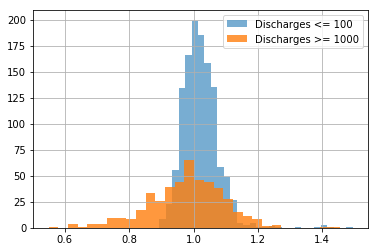

In [83]:
df[df.Discharges <= 100]['Excess Readmission Ratio'].hist(bins = 30, alpha = 0.6, label = 'Discharges <= 100');
df[df.Discharges >= 1000]['Excess Readmission Ratio'].hist(bins = 30, alpha = 0.8, label = 'Discharges >= 1000');
plt.legend(loc='upper right');